<a href="https://colab.research.google.com/github/kayal466/DW26-task-6/blob/main/Dw26_Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [ ]:
df = pd.read_csv("car_data.csv")

In [ ]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [ ]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

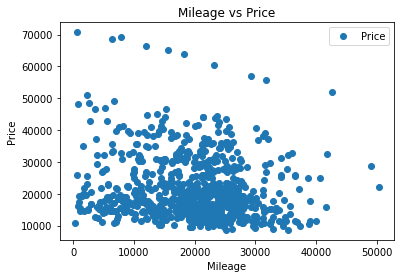

In [ ]:
df.plot(x='Mileage', y='Price', style='o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

**Find the linear regression equation** **for mileage** **vs price**.

In [ ]:
x=df["Mileage"]
y=df["Price"]

In [ ]:
x

0       8221
1       9135
2      13196
3      16342
4      19832
       ...  
799    16229
800    19095
801    20484
802    25979
803    35662
Name: Mileage, Length: 804, dtype: int64

In [ ]:
y

0      17314.103129
1      17542.036083
2      16218.847862
3      16336.913140
4      16339.170324
           ...     
799    16507.070267
800    16175.957604
801    15731.132897
802    15118.893228
803    13585.636802
Name: Price, Length: 804, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

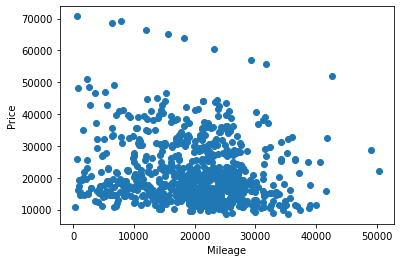

In [ ]:
plt.scatter(x,y)
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

In [ ]:
x_ols=sm.add_constant(x)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print(x_ols)

     const  Mileage
0      1.0     8221
1      1.0     9135
2      1.0    13196
3      1.0    16342
4      1.0    19832
..     ...      ...
799    1.0    16229
800    1.0    19095
801    1.0    20484
802    1.0    25979
803    1.0    35662

[804 rows x 2 columns]


In [ ]:
model=sm.OLS(y,x_ols)

In [ ]:
result=model.fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     16.75
Date:                Sun, 27 Nov 2022   Prob (F-statistic):           4.68e-05
Time:                        16:37:37   Log-Likelihood:                -8527.8
No. Observations:                 804   AIC:                         1.706e+04
Df Residuals:                     802   BIC:                         1.707e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.476e+04    904.363     27.383      0.000     2.3e+04    2.65e+04
Mileage       -0.1725      0.042     -4.093      0.000      -0.255      -0.090
==============================================================================
Omnibus:                      236.450   Durbin-Watson:                   0.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              605.297
Skew:                           1.522   Prob(JB):                    3.64e-132
Kurtosis:                       5.966   Cond. No.                     5.62e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

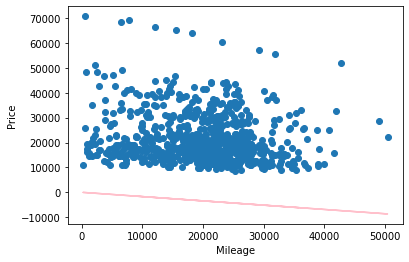

In [ ]:
plt.scatter(x,y)
yhat=2.476+-0.1725*x
plt.plot(x,yhat,c="pink")
plt.xlabel ("Mileage")
plt.ylabel("Price")
plt.show()

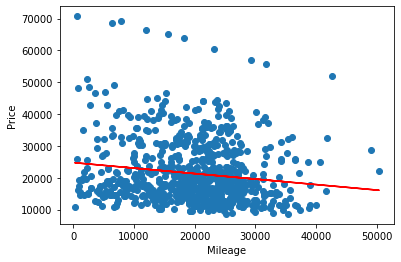

In [ ]:
plt.scatter(x,y)
yhat=result.params[0]+result.params[1]*x
plt.plot(x,yhat,c="red")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

In [ ]:
regr_bb = linear_model.LinearRegression()
x = df[['Mileage']]
y= df['Price']
regr_bb.fit(x,y)

LinearRegression()

In [ ]:
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'
      .format(regr_bb.coef_[0], regr_bb.intercept_))

Linear Regression Equation: y = -0.1725 * x + 24764.5590


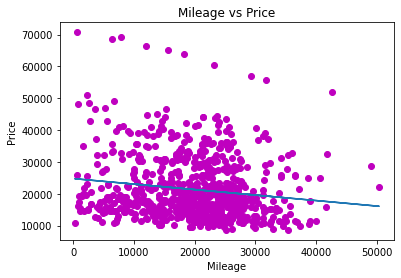

In [ ]:
plt.scatter(x, y, color='m')
plt.plot(x, regr_bb.predict(x))
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [ ]:
print('R^2 score for this equation: {:.4f}'
      .format(regr_bb.score(x,y)))

R^2 score for this equation: 0.0205


This score is lesser than 0.8, so it is not a good fit for this data.

# TASK 2

In [ ]:
x_ols1=sm.add_constant(x1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model1=sm.OLS(y1,x_ols1)

In [ ]:
result1=model1.fit()

In [ ]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.036e+30
Date:                Sun, 27 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:20:44   Log-Likelihood:                 17945.
No. Observations:                 804   AIC:                        -3.587e+04
Df Residuals:                     795   BIC:                        -3.583e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.547e-11   1.26e-11     -2.809      0.005   -6.03e-11   -1.07e-11
Price          1.0000   2.36e-16   4.23e+15      0.000       1.000       1.000
Mileage     2.776e-16   2.16e-16      1.282      0.200   -1.47e-16    7.02e-16
Cylinder    2.899e-12   4.65e-12      0.624      0.533   -6.22e-12     1.2e-11
Liter      -2.331e-12   5.79e-12     -0.403      0.687   -1.37e-11    9.03e-12
Doors       5.684e-13   2.17e-12      0.262      0.793   -3.69e-12    4.83e-12
Cruise     -2.615e-12   4.64e-12     -0.564      0.573   -1.17e-11    6.48e-12
Sound      -2.615e-12   3.84e-12     -0.680      0.497   -1.02e-11    4.93e-12
Leather    -1.364e-12   4.07e-12     -0.336      0.737   -9.35e-12    6.62e-12
==============================================================================
Omnibus:                      170.369   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              315.250
Skew:                           1.251   Prob(JB):                     3.50e-69
Kurtosis:                       4.776   Cond. No.                     2.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
c = df.columns.tolist() 
c = [i for i in c if i not in ["Make","Model","Trim","Type"]]
x1 = df[c]
y1 = df["Price"] 

In [ ]:
regr= linear_model.LinearRegression()
x1 = df[c]
y1= df['Price']
regr.fit(x,y)

LinearRegression()

In [ ]:
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'
      .format(regr_bb.coef_[0], regr_bb.intercept_))

Linear Regression Equation: y = 1.0000 * x + 0.0000


In [ ]:
print('R^2 score for this equation: {:.4f}'
      .format(regr_bb.score(x1,y1)))

R^2 score for this equation: 1.0000


# This score is greatr than 0.8, so it is a good fit for this data.

In [ ]:
import numpy as np
from sklearn.dummy import DummyRegressor
X = np.array(x)
y = np.array(y)
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X, y)
DummyRegressor()
dummy_regr.predict(X)
#array([5., 5., 5., 5.])
dummy_regr.score(X, y)

0.0